##### Contexte : 

Quantifier et qualifier le traitement médiatique des enjeux écologiques et fournir des chiffres pour objectiver le dialogue avec les médias

- Analyser toute page : lemonde.fr

#### Import des librairies

In [69]:
# Import des librairies
import glob
import re
from pathlib import Path
import pandas as pd 
import numpy as np
import math
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt
# Pour les warnings
import warnings
warnings.filterwarnings('ignore')
# Pour le tritement de texte
import nltk
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [3]:
#Modification des paramètres d'affichages des colonnes, lignes et largeurs des colonnes pour obtenir le 
#plus d'informations
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('float_format',lambda x: "%.4f" % x)

In [70]:
# appel des fonctions necessaires
%run functions.py

In [159]:
path="/Users/hananemaghlazi/Projet_6_examples/Parquet_Janvier"
path

'/Users/hananemaghlazi/Projet_6_examples/Parquet_Janvier'

In [160]:
parquet = os.listdir(path)
parquet

['20230101.parquet',
 '20230111.parquet',
 '20230118.parquet',
 '20230108.parquet',
 '20230127.parquet',
 '20230109.parquet',
 '20230119.parquet',
 '.DS_Store',
 '20230126.parquet',
 '20230110.parquet',
 '20230124.parquet',
 '20230102.parquet',
 '20230112.parquet',
 '20230113.parquet',
 '20230103.parquet',
 '20230125.parquet',
 '20230120.parquet',
 '20230130.parquet',
 '20230129.parquet',
 '20230106.parquet',
 '20230116.parquet',
 '20230128.parquet',
 '20230117.parquet',
 '20230107.parquet',
 '20230131.parquet',
 '20230121.parquet',
 '20230105.parquet',
 '20230115.parquet',
 '20230123.parquet',
 '20230122.parquet',
 '20230114.parquet',
 '20230104.parquet']

In [205]:
for f in parquet:
    df = pd.read_parquet(path)

In [206]:
df.head()

url  \
64318                                                             https://www.lemonde.fr/disparitions/article/2022/12/31/barbara-walters-legende-de-la-television-americaine-est-morte-a-93-ans_6156166_3382.html   
64319                                                        https://www.lemonde.fr/international/article/2022/12/31/entre-la-syrie-et-la-turquie-un-premier-pas-officiel-vers-un-rapprochement_6156164_3210.html   
64320                               https://www.lemonde.fr/argent/article/2022/12/31/passoires-thermiques-timbres-smic-gaz-carburant-ce-qui-change-le-1er-janvier-pour-le-budget-des-menages_6156161_1657007.html   
64321      https://www.lemonde.fr/idees/article/2022/12/31/en-guyane-la-transition-energetique-ne-se-fera-pas-en-niant-les-droits-des-peuples-autochtones-et-en-saccageant-la-foret-amazonienne_6156169_3232.html   
64322  https://www.lemonde.fr/idees/article/2022/12/31/mort-de-mahsa-amini-la-seule-maniere-de-mettre-fin-a-la-crise-en-iran-est-d-en-finir-avec-l-intervention-des-religieux-dans-la-politique_6156168_3232.html   

       news news_publication publication_name publication_language  \
64318  None             None         Le Monde                   fr   
64319  None             None         Le Monde                   fr   
64320  None             None         Le Monde                   fr   
64321  None             None         Le Monde                   fr   
64322  None             None         Le Monde                   fr   

      news_publication_date  \
64318   2022-12-31 10:00:26   
64319   2022-12-31 14:43:55   
64320   2022-12-31 06:01:39   
64321   2022-12-31 08:00:20   
64322   2022-12-31 08:00:10   

                                                                                                                                           news_title  \
64318                                                                        Barbara Walters, légende de la télévision américaine, est morte à 93 ans   
64319                                                                     Entre la Syrie et la Turquie, un premier pas officiel vers un rapprochement   
64320                                   Passoires thermiques, timbres, smic, gaz, carburant : ce qui change le 1er janvier pour le budget des ménages   
64321       En Guyane, « la transition énergétique ne se fera pas en niant les droits des peuples autochtones et en saccageant la forêt amazonienne »   
64322  Mort de Mahsa Amini : « La seule manière de mettre fin à la crise en Iran est d’en finir avec l’intervention des religieux dans la politique »   

      news_keywords image  \
64318          None  None   
64319          None  None   
64320          None  None   
64321          None  None   
64322          None  None   

                                                                                                                                           image_loc  \
64318  https://img.lemde.fr/2022/12/31/307/0/2852/1426/1440/720/60/0/2aefa65_6ecc96ea1de147f3a8667f420f8ca74a-0-4957a456686b4458a6dda828748cb38c.jpg   
64319                                       https://img.lemde.fr/2022/12/30/273/0/3277/1638/1440/720/60/0/eab1351_1672390913048-ap22203813165385.jpg   
64320                              https://img.lemde.fr/2022/12/29/0/0/12000/6000/1440/720/60/0/c2dc5d0_1672331682749-080-hl-hpassarello-1045946.jpg   
64321                           https://img.lemde.fr/2021/05/24/118/0/1600/800/1440/720/60/0/bc641a8_712450648-09-tgy7363-tanguystoeckle-preview.jpg   
64322                                               https://img.lemde.fr/2022/10/08/291/0/3500/1750/1440/720/60/0/73acbf5_fw1-iran-women-0918-11.jpg   

                                                                                                                                                                                    image_caption  \
64318                                                                                                              

#### Inspection des données

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2912 entries, 64318 to 67229
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   url                    2912 non-null   object             
 1   news                   0 non-null      object             
 2   news_publication       0 non-null      object             
 3   publication_name       2912 non-null   object             
 4   publication_language   2912 non-null   object             
 5   news_publication_date  2912 non-null   datetime64[ns]     
 6   news_title             2912 non-null   object             
 7   news_keywords          0 non-null      object             
 8   image                  0 non-null      object             
 9   image_loc              2901 non-null   object             
 10  image_caption          2242 non-null   object             
 11  sitemap                2912 non-null   object      

In [182]:
# Extraction de la section: cette colonne est sous forme de liste 
df["section"]=df["section"].str[0]

In [34]:
summary(df)

Data shape: (2912, 26)
___________________________
Data types:
object                 19
datetime64[ns]          3
datetime64[ns, UTC]     2
float64                 2
Name: types, dtype: int64
___________________________


types  counts  uniques  nulls
changefreq                          object       0        1   2912
download_date               datetime64[ns]    2912       31      0
download_date_last          datetime64[ns]    2912       31      0
etag                                object    2912       31      0
image                               object       0        1   2912
image_caption                       object    2242     2232    670
image_loc                           object    2901     2852     11
image_title                         object       0        1   2912
lastmod                datetime64[ns, UTC]    2912     2902      0
media                               object    2912        1      0
media_type                          object    2912        1      0
news                                object       0        1   2912
news_access                         object       0        1   2912
news_genres                         object       0        1   2912
news_keywords                       object       0        1   2912
news_publication                    object       0        1   2912
news_publication_date       datetime64[ns]    2912     2902      0
news_title                          object    2912     2908      0
priority                           float64       0        1   2912
publication_language                object    2912        1      0
publication_name                    object    2912        1      0
section                             object    2912       48      0
sitemap                             object    2912        1      0
sitemap_last_modified  datetime64[ns, UTC]    2912       31      0
sitemap_size_mb                    float64    2912       31      0
url                                 object    2912     2912      0

Beaucoup de colonnes à une valeur unique et nan et non utile pour l'analyse

In [183]:
#Suppresssion des colonnes nulls et sans utilité
print("colonnes avant supression",df.shape[1])
col_to_drop=["priority","changefreq","image","image_title","news","news_access","news_genres","news_keywords",
             "news_publication","publication_language","image_loc","sitemap","media_type","media_type",
             "sitemap_size_mb","sitemap","media","publication_name"]
df.drop(col_to_drop,axis=1,inplace=True)
print("colonnes après supression",df.shape[1])

colonnes avant supression 26
colonnes après supression 10


- Valeurs manquantes

In [36]:
missing_values(df)

Variable  nan      %nan
3          image_caption  670  23.0082%
0                    url    0   0.0000%
1  news_publication_date    0   0.0000%
2             news_title    0   0.0000%
4                   etag    0   0.0000%
5  sitemap_last_modified    0   0.0000%
6          download_date    0   0.0000%
7                section    0   0.0000%
8                lastmod    0   0.0000%
9     download_date_last    0   0.0000%

In [50]:
df.head()

url  \
64318                                                             https://www.lemonde.fr/disparitions/article/2022/12/31/barbara-walters-legende-de-la-television-americaine-est-morte-a-93-ans_6156166_3382.html   
64319                                                        https://www.lemonde.fr/international/article/2022/12/31/entre-la-syrie-et-la-turquie-un-premier-pas-officiel-vers-un-rapprochement_6156164_3210.html   
64320                               https://www.lemonde.fr/argent/article/2022/12/31/passoires-thermiques-timbres-smic-gaz-carburant-ce-qui-change-le-1er-janvier-pour-le-budget-des-menages_6156161_1657007.html   
64321      https://www.lemonde.fr/idees/article/2022/12/31/en-guyane-la-transition-energetique-ne-se-fera-pas-en-niant-les-droits-des-peuples-autochtones-et-en-saccageant-la-foret-amazonienne_6156169_3232.html   
64322  https://www.lemonde.fr/idees/article/2022/12/31/mort-de-mahsa-amini-la-seule-maniere-de-mettre-fin-a-la-crise-en-iran-est-d-en-finir-avec-l-intervention-des-religieux-dans-la-politique_6156168_3232.html   

      news_publication_date  \
64318   2022-12-31 10:00:26   
64319   2022-12-31 14:43:55   
64320   2022-12-31 06:01:39   
64321   2022-12-31 08:00:20   
64322   2022-12-31 08:00:10   

                                                                                                                                           news_title  \
64318                                                                        Barbara Walters, légende de la télévision américaine, est morte à 93 ans   
64319                                                                     Entre la Syrie et la Turquie, un premier pas officiel vers un rapprochement   
64320                                   Passoires thermiques, timbres, smic, gaz, carburant : ce qui change le 1er janvier pour le budget des ménages   
64321       En Guyane, « la transition énergétique ne se fera pas en niant les droits des peuples autochtones et en saccageant la forêt amazonienne »   
64322  Mort de Mahsa Amini : « La seule manière de mettre fin à la crise en Iran est d’en finir avec l’intervention des religieux dans la politique »   

                                                                                                                                                                                    image_caption  \
64318                                                                                                                              Barbara Walters, le 7 octobre 2014, à l’université de Harvard.   
64319  Le ministre russe de la défense, Sergueï Choïgou, à gauche, et son homologue turc, Hulusi Akar, se serrent la main lors d’une réunion à Istanbul, en Turquie, le vendredi 22 juillet 2022.   
64320                                                                                                     Devant une borne de rechargement du passe Navigo, dans le métro parisien, en mars 2020.   
64321                                                                                                                               Dans la réserve naturelle nationale des Nouragues, en Guyane.   
64322                                                                                                                                                                                        None   

                                     etag     sitemap_last_modified  \
64318  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   
64319  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   
64320  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   
64321  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   
64322  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   

            download_date        section                   lastmod  \
64318 2023-01-01 01:48:03   disparitions 2022-12-31 09:00:26+00:00   
64319 2023-01-01 01:48:03  international 2022-12-31 13:43:55+00:00   
6

Les colonnes qui nous intéressent : news_title, section, image_caption ?

In [44]:
df.section.value_counts()

international             473
idees                     286
economie                  286
culture                   233
politique                 224
societe                   219
afrique                   180
sport                     166
planete                   120
m-styles                   95
livres                     69
sciences                   66
m-le-mag                   61
les-decodeurs              47
pixels                     47
disparitions               45
campus                     43
m-perso                    41
argent                     36
le-monde-passe-a-table     25
podcasts                   24
emploi                     21
football                    8
police-justice              8
le-monde-des-religions      8
mondephilatelique           7
cinema                      7
smart-cities                6
musiques                    6
actualite-medias            6
videos                      5
series                      5
un-si-proche-orient         5
sante     

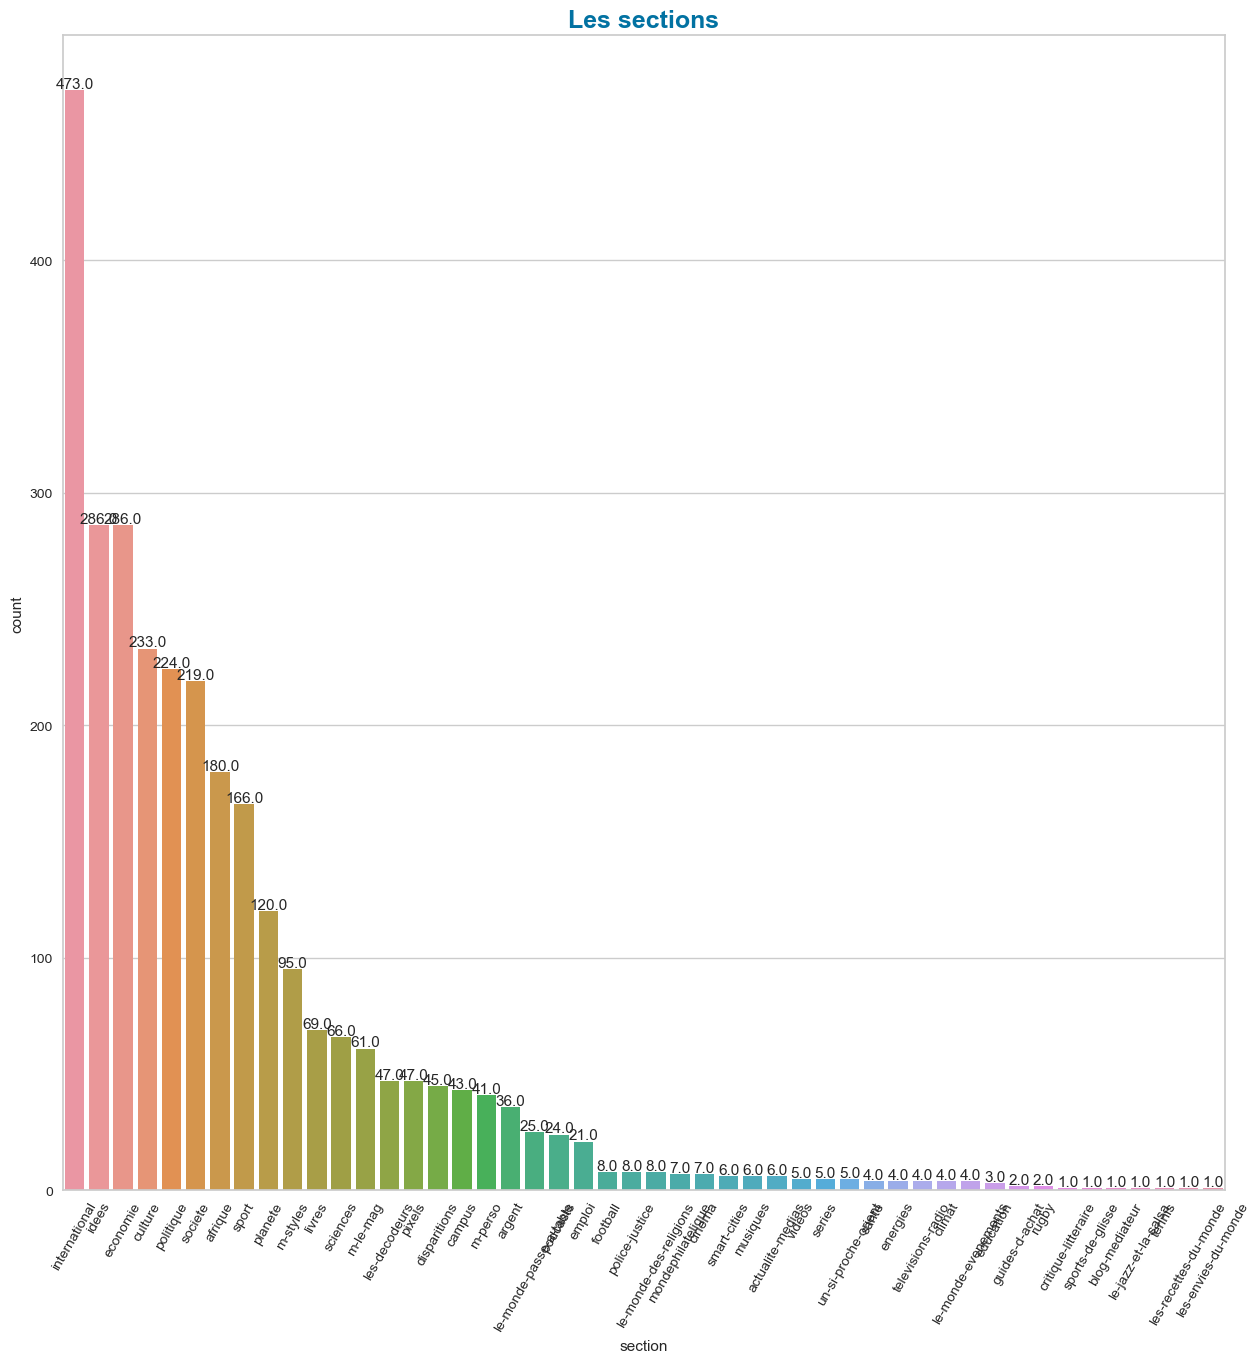

In [48]:
plot_cnt(df,"section","Les sections")

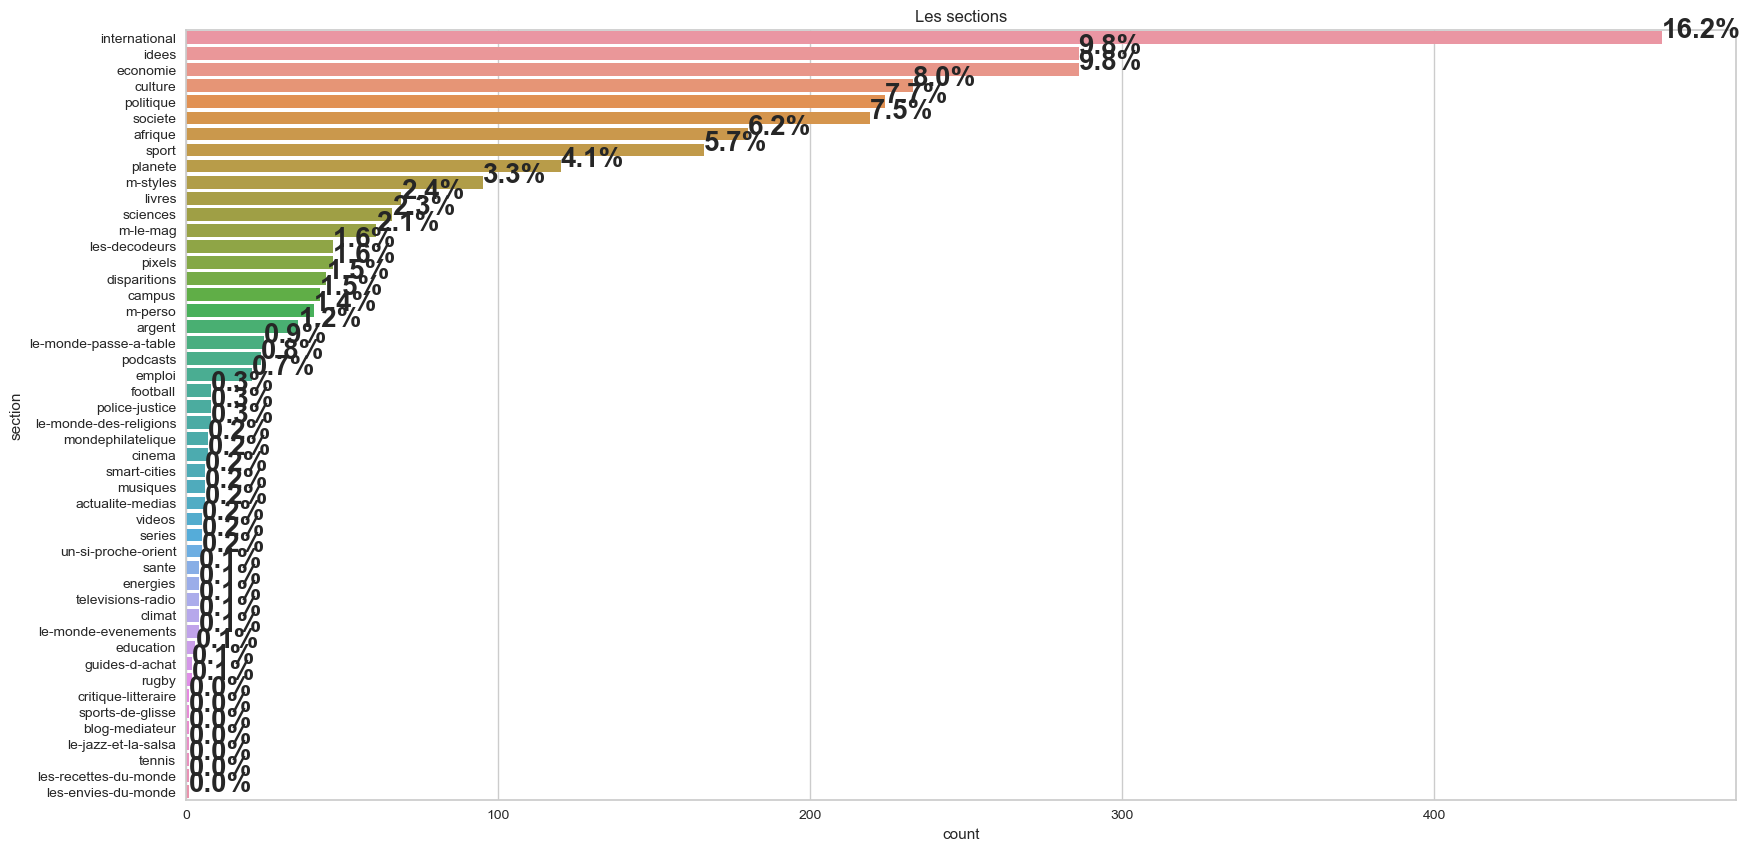

In [49]:
plot_stat(df,"section","Les sections")

- Combiner news_title et image_caption
- Il y a des données manquantes sur la colonne image_caption
- Imputation

In [184]:
df["image_caption"].fillna(" ",inplace = True)

In [61]:
missing_values(df)

Variable  nan      %nan
10                   text  670  23.0082%
0                     url    0   0.0000%
1   news_publication_date    0   0.0000%
2              news_title    0   0.0000%
3           image_caption    0   0.0000%
4                    etag    0   0.0000%
5   sitemap_last_modified    0   0.0000%
6           download_date    0   0.0000%
7                 section    0   0.0000%
8                 lastmod    0   0.0000%
9      download_date_last    0   0.0000%

In [185]:
df["text"]=df["news_title"]+" "+df["image_caption"]

In [186]:
df.head()

url  \
64318                                                             https://www.lemonde.fr/disparitions/article/2022/12/31/barbara-walters-legende-de-la-television-americaine-est-morte-a-93-ans_6156166_3382.html   
64319                                                        https://www.lemonde.fr/international/article/2022/12/31/entre-la-syrie-et-la-turquie-un-premier-pas-officiel-vers-un-rapprochement_6156164_3210.html   
64320                               https://www.lemonde.fr/argent/article/2022/12/31/passoires-thermiques-timbres-smic-gaz-carburant-ce-qui-change-le-1er-janvier-pour-le-budget-des-menages_6156161_1657007.html   
64321      https://www.lemonde.fr/idees/article/2022/12/31/en-guyane-la-transition-energetique-ne-se-fera-pas-en-niant-les-droits-des-peuples-autochtones-et-en-saccageant-la-foret-amazonienne_6156169_3232.html   
64322  https://www.lemonde.fr/idees/article/2022/12/31/mort-de-mahsa-amini-la-seule-maniere-de-mettre-fin-a-la-crise-en-iran-est-d-en-finir-avec-l-intervention-des-religieux-dans-la-politique_6156168_3232.html   

      news_publication_date  \
64318   2022-12-31 10:00:26   
64319   2022-12-31 14:43:55   
64320   2022-12-31 06:01:39   
64321   2022-12-31 08:00:20   
64322   2022-12-31 08:00:10   

                                                                                                                                           news_title  \
64318                                                                        Barbara Walters, légende de la télévision américaine, est morte à 93 ans   
64319                                                                     Entre la Syrie et la Turquie, un premier pas officiel vers un rapprochement   
64320                                   Passoires thermiques, timbres, smic, gaz, carburant : ce qui change le 1er janvier pour le budget des ménages   
64321       En Guyane, « la transition énergétique ne se fera pas en niant les droits des peuples autochtones et en saccageant la forêt amazonienne »   
64322  Mort de Mahsa Amini : « La seule manière de mettre fin à la crise en Iran est d’en finir avec l’intervention des religieux dans la politique »   

                                                                                                                                                                                    image_caption  \
64318                                                                                                                              Barbara Walters, le 7 octobre 2014, à l’université de Harvard.   
64319  Le ministre russe de la défense, Sergueï Choïgou, à gauche, et son homologue turc, Hulusi Akar, se serrent la main lors d’une réunion à Istanbul, en Turquie, le vendredi 22 juillet 2022.   
64320                                                                                                     Devant une borne de rechargement du passe Navigo, dans le métro parisien, en mars 2020.   
64321                                                                                                                               Dans la réserve naturelle nationale des Nouragues, en Guyane.   
64322                                                                                                                                                                                               

                                     etag     sitemap_last_modified  \
64318  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   
64319  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   
64320  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   
64321  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   
64322  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   

            download_date        section                   lastmod  \
64318 2023-01-01 01:48:03   disparitions 2022-12-31 09:00:26+00:00   
64319 2023-01-01 01:48:03  international 2022-12-31 13:43:55+00:00   
6

- Nettoyage de la colonne texte :

In [187]:
# retirer les chiffres et caractères spéciaux
def search_words(text):
    result = re.findall(r'\b[^\d\W]+\b', text)
    
    return " ".join(result)

df['text']=df['text'].apply(lambda x : search_words(x))

In [188]:
df.head()

url  \
64318                                                             https://www.lemonde.fr/disparitions/article/2022/12/31/barbara-walters-legende-de-la-television-americaine-est-morte-a-93-ans_6156166_3382.html   
64319                                                        https://www.lemonde.fr/international/article/2022/12/31/entre-la-syrie-et-la-turquie-un-premier-pas-officiel-vers-un-rapprochement_6156164_3210.html   
64320                               https://www.lemonde.fr/argent/article/2022/12/31/passoires-thermiques-timbres-smic-gaz-carburant-ce-qui-change-le-1er-janvier-pour-le-budget-des-menages_6156161_1657007.html   
64321      https://www.lemonde.fr/idees/article/2022/12/31/en-guyane-la-transition-energetique-ne-se-fera-pas-en-niant-les-droits-des-peuples-autochtones-et-en-saccageant-la-foret-amazonienne_6156169_3232.html   
64322  https://www.lemonde.fr/idees/article/2022/12/31/mort-de-mahsa-amini-la-seule-maniere-de-mettre-fin-a-la-crise-en-iran-est-d-en-finir-avec-l-intervention-des-religieux-dans-la-politique_6156168_3232.html   

      news_publication_date  \
64318   2022-12-31 10:00:26   
64319   2022-12-31 14:43:55   
64320   2022-12-31 06:01:39   
64321   2022-12-31 08:00:20   
64322   2022-12-31 08:00:10   

                                                                                                                                           news_title  \
64318                                                                        Barbara Walters, légende de la télévision américaine, est morte à 93 ans   
64319                                                                     Entre la Syrie et la Turquie, un premier pas officiel vers un rapprochement   
64320                                   Passoires thermiques, timbres, smic, gaz, carburant : ce qui change le 1er janvier pour le budget des ménages   
64321       En Guyane, « la transition énergétique ne se fera pas en niant les droits des peuples autochtones et en saccageant la forêt amazonienne »   
64322  Mort de Mahsa Amini : « La seule manière de mettre fin à la crise en Iran est d’en finir avec l’intervention des religieux dans la politique »   

                                                                                                                                                                                    image_caption  \
64318                                                                                                                              Barbara Walters, le 7 octobre 2014, à l’université de Harvard.   
64319  Le ministre russe de la défense, Sergueï Choïgou, à gauche, et son homologue turc, Hulusi Akar, se serrent la main lors d’une réunion à Istanbul, en Turquie, le vendredi 22 juillet 2022.   
64320                                                                                                     Devant une borne de rechargement du passe Navigo, dans le métro parisien, en mars 2020.   
64321                                                                                                                               Dans la réserve naturelle nationale des Nouragues, en Guyane.   
64322                                                                                                                                                                                               

                                     etag     sitemap_last_modified  \
64318  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   
64319  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   
64320  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   
64321  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   
64322  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   

            download_date        section                   lastmod  \
64318 2023-01-01 01:48:03   disparitions 2022-12-31 09:00:26+00:00   
64319 2023-01-01 01:48:03  international 2022-12-31 13:43:55+00:00   
6

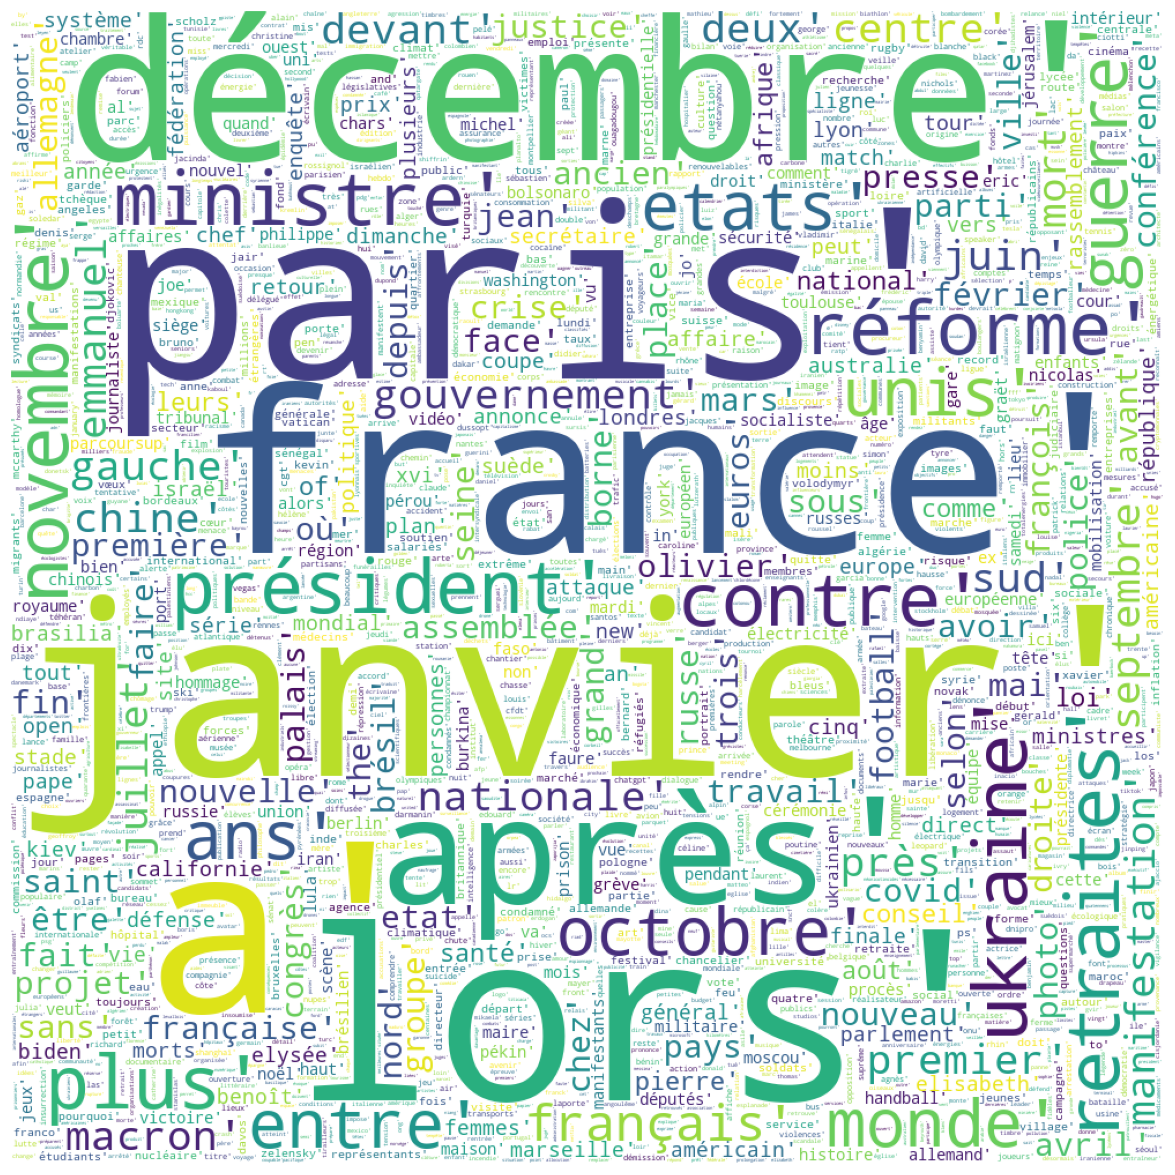

In [71]:
plt.figure(figsize=(15,15))
wordCloudFunction(df,'text',100000)

In [189]:
df

url  \
64318                                                             https://www.lemonde.fr/disparitions/article/2022/12/31/barbara-walters-legende-de-la-television-americaine-est-morte-a-93-ans_6156166_3382.html   
64319                                                        https://www.lemonde.fr/international/article/2022/12/31/entre-la-syrie-et-la-turquie-un-premier-pas-officiel-vers-un-rapprochement_6156164_3210.html   
64320                               https://www.lemonde.fr/argent/article/2022/12/31/passoires-thermiques-timbres-smic-gaz-carburant-ce-qui-change-le-1er-janvier-pour-le-budget-des-menages_6156161_1657007.html   
64321      https://www.lemonde.fr/idees/article/2022/12/31/en-guyane-la-transition-energetique-ne-se-fera-pas-en-niant-les-droits-des-peuples-autochtones-et-en-saccageant-la-foret-amazonienne_6156169_3232.html   
64322  https://www.lemonde.fr/idees/article/2022/12/31/mort-de-mahsa-amini-la-seule-maniere-de-mettre-fin-a-la-crise-en-iran-est-d-en-finir-avec-l-intervention-des-religieux-dans-la-politique_6156168_3232.html   
...                                                                                                                                                                                                           ...   
67225                                                    https://www.lemonde.fr/culture/article/2023/01/30/le-musee-d-orsay-s-enrichit-d-une-toile-de-caillebotte-estimee-a-43-millions-d-euros_6159826_3246.html   
67226                                                        https://www.lemonde.fr/disparitions/article/2023/01/30/la-mort-de-claude-gerard-figure-emblematique-du-cinema-independant-parisien_6159828_3382.html   
67227                                                                                     https://www.lemonde.fr/disparitions/article/2023/01/30/le-resistant-et-deporte-jacques-bloch-est-mort_6159821_3382.html   
67228                                                              https://www.lemonde.fr/culture/article/2023/01/30/architecture-a-roubaix-la-revolte-des-habitants-du-quartier-de-l-alma-gare_6159820_3246.html   
67229                                                                           https://www.lemonde.fr/afrique/article/2023/01/30/l-afrique-subsaharienne-a-nouveau-face-au-spectre-de-la-dette_6159830_3212.html   

      news_publication_date  \
64318   2022-12-31 10:00:26   
64319   2022-12-31 14:43:55   
64320   2022-12-31 06:01:39   
64321   2022-12-31 08:00:20   
64322   2022-12-31 08:00:10   
...                     ...   
67225   2023-01-31 00:24:34   
67226   2023-01-30 09:14:44   
67227   2023-01-30 08:31:03   
67228   2023-01-31 02:03:23   
67229   2023-01-30 16:43:54   

                                                                                                                                           news_title  \
64318                                                                        Barbara Walters, légende de la télévision américaine, est morte à 93 ans   
64319                                                                     Entre la Syrie et la Turquie, un premier pas officiel vers un rapprochement   
64320                                   Passoires thermiques, timbres, smic, gaz, carburant : ce qui change le 1er janvier pour le budget des ménages   
64321       En Guyane, « la transition énergétique ne se fera pas en niant les droits des peuples autochtones et en saccageant la forêt amazonienne »   
64322  Mort de Mahsa Amini : « La seule manière de mettre fin à la crise en Iran est d’en finir avec l’intervention des religieux dans la politique »   
...                                                                                                                                               ...   
67225                                                            Le Musée d’Orsay s’enrichit d’une toile de Caillebotte estimée à 43 millions d’euros   
67226                                               

In [198]:
#df.groupby(["section"]).count()

Recherche par mots clés:

In [140]:
# Liste des mots clés à rechercher et compter

CLIMATE_KW = [
    "planète", 
    "environnement", 
    "crise-climatique",
    "climatique",
    "climat",
    "énergie",
    "gaz",
    " cop27",
    "  cop ",
    "climatique",
    "écologie",
    "CO2",
    "effet de serre",
    "transition énergetique",
    "carbone",
    "sécheresse",
    "methane",
    "GIEC",
    "zéro émission",
    "réchauffement",
    "changement climatique",
    "réchauffement de la planete",
    "réchauffement climatique",
    "réchauffement climatique anthropique",
    "risque climatique",
    "impact climatique",
    "Empreinte carbone",
    "Budget énergétique"
]

In [141]:
output = {}
for word in CLIMATE_KW:
    output[word] = df['text'].str.contains(word).sum()
    
print(output)

{'planète': 1, 'environnement': 6, 'crise-climatique': 0, 'climatique': 23, 'climat': 33, 'énergie': 20, 'gaz': 24, ' cop27': 0, '  cop ': 0, 'écologie': 5, 'CO2': 0, 'effet de serre': 0, 'transition énergetique': 0, 'carbone': 8, 'sécheresse': 3, 'methane': 0, 'GIEC': 0, 'zéro émission': 0, 'réchauffement': 2, 'changement climatique': 1, 'réchauffement de la planete': 0, 'réchauffement climatique': 2, 'réchauffement climatique anthropique': 0, 'risque climatique': 0, 'impact climatique': 0, 'Empreinte carbone': 0, 'Budget énergétique': 0}


In [142]:
counter_word=df.text.str.findall('|'.join(CLIMATE_KW)).explode().value_counts()
counter_word

gaz                      33
climatique               24
énergie                  23
climat                   17
carbone                   8
environnement             6
écologie                  5
sécheresse                4
réchauffement             2
planète                   1
changement climatique     1
Name: text, dtype: int64

<BarContainer object of 11 artists>

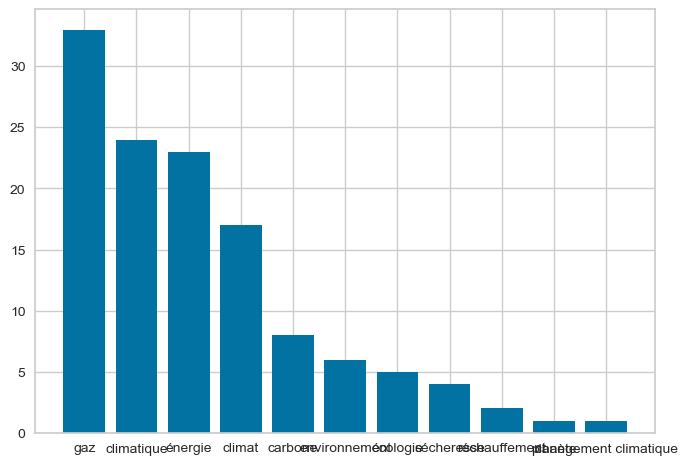

In [143]:
plt.bar(counter_word.index,counter_word.values)

In [95]:
df["count"]=df["text"].apply(lambda n: len(n.split()))

In [97]:
df.head()

url  \
64318                                                             https://www.lemonde.fr/disparitions/article/2022/12/31/barbara-walters-legende-de-la-television-americaine-est-morte-a-93-ans_6156166_3382.html   
64319                                                        https://www.lemonde.fr/international/article/2022/12/31/entre-la-syrie-et-la-turquie-un-premier-pas-officiel-vers-un-rapprochement_6156164_3210.html   
64320                               https://www.lemonde.fr/argent/article/2022/12/31/passoires-thermiques-timbres-smic-gaz-carburant-ce-qui-change-le-1er-janvier-pour-le-budget-des-menages_6156161_1657007.html   
64321      https://www.lemonde.fr/idees/article/2022/12/31/en-guyane-la-transition-energetique-ne-se-fera-pas-en-niant-les-droits-des-peuples-autochtones-et-en-saccageant-la-foret-amazonienne_6156169_3232.html   
64322  https://www.lemonde.fr/idees/article/2022/12/31/mort-de-mahsa-amini-la-seule-maniere-de-mettre-fin-a-la-crise-en-iran-est-d-en-finir-avec-l-intervention-des-religieux-dans-la-politique_6156168_3232.html   

      news_publication_date  \
64318   2022-12-31 10:00:26   
64319   2022-12-31 14:43:55   
64320   2022-12-31 06:01:39   
64321   2022-12-31 08:00:20   
64322   2022-12-31 08:00:10   

                                                                                                                                           news_title  \
64318                                                                        Barbara Walters, légende de la télévision américaine, est morte à 93 ans   
64319                                                                     Entre la Syrie et la Turquie, un premier pas officiel vers un rapprochement   
64320                                   Passoires thermiques, timbres, smic, gaz, carburant : ce qui change le 1er janvier pour le budget des ménages   
64321       En Guyane, « la transition énergétique ne se fera pas en niant les droits des peuples autochtones et en saccageant la forêt amazonienne »   
64322  Mort de Mahsa Amini : « La seule manière de mettre fin à la crise en Iran est d’en finir avec l’intervention des religieux dans la politique »   

                                                                                                                                                                                    image_caption  \
64318                                                                                                                              Barbara Walters, le 7 octobre 2014, à l’université de Harvard.   
64319  Le ministre russe de la défense, Sergueï Choïgou, à gauche, et son homologue turc, Hulusi Akar, se serrent la main lors d’une réunion à Istanbul, en Turquie, le vendredi 22 juillet 2022.   
64320                                                                                                     Devant une borne de rechargement du passe Navigo, dans le métro parisien, en mars 2020.   
64321                                                                                                                               Dans la réserve naturelle nationale des Nouragues, en Guyane.   
64322                                                                                                                                                                                               

                                     etag     sitemap_last_modified  \
64318  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   
64319  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   
64320  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   
64321  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   
64322  "597c9bf8fc520caad7935c42820685ff" 2023-01-01 01:47:06+00:00   

            download_date        section                   lastmod  \
64318 2023-01-01 01:48:03   disparitions 2022-12-31 09:00:26+00:00   
64319 2023-01-01 01:48:03  international 2022-12-31 13:43:55+00:00   
6

In [144]:
#df_count = pd.DataFrame(counter_word,CLIMATE_KW, index='CLIMATE_KW'
df_count = pd.DataFrame(counter_word,CLIMATE_KW  )        
df_count.reset_index(inplace=True)                                                 
df_count.rename(
    columns={"index": "words", "url_clean": "cnt"},
    inplace=True,
)
df_count.dropna(inplace=True)

In [145]:
df_count

words    text
0                 planète  1.0000
1           environnement  6.0000
3              climatique 24.0000
4                  climat 17.0000
5                 énergie 23.0000
6                     gaz 33.0000
9              climatique 24.0000
10               écologie  5.0000
14                carbone  8.0000
15             sécheresse  4.0000
19          réchauffement  2.0000
20  changement climatique  1.0000

In [146]:
# Apparition des mots clés par rapport à tous les mots du texte
def bar_plot(x,y,data):
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.barplot(y=y, x=x, data=df_count)
    ax.set_title("Pourcentage d'apparition des mots cibles",fontsize=20)


    for p in ax.patches:
        percentage = '{:.4f}%'.format(100 * p.get_width()/df["count"].sum())
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

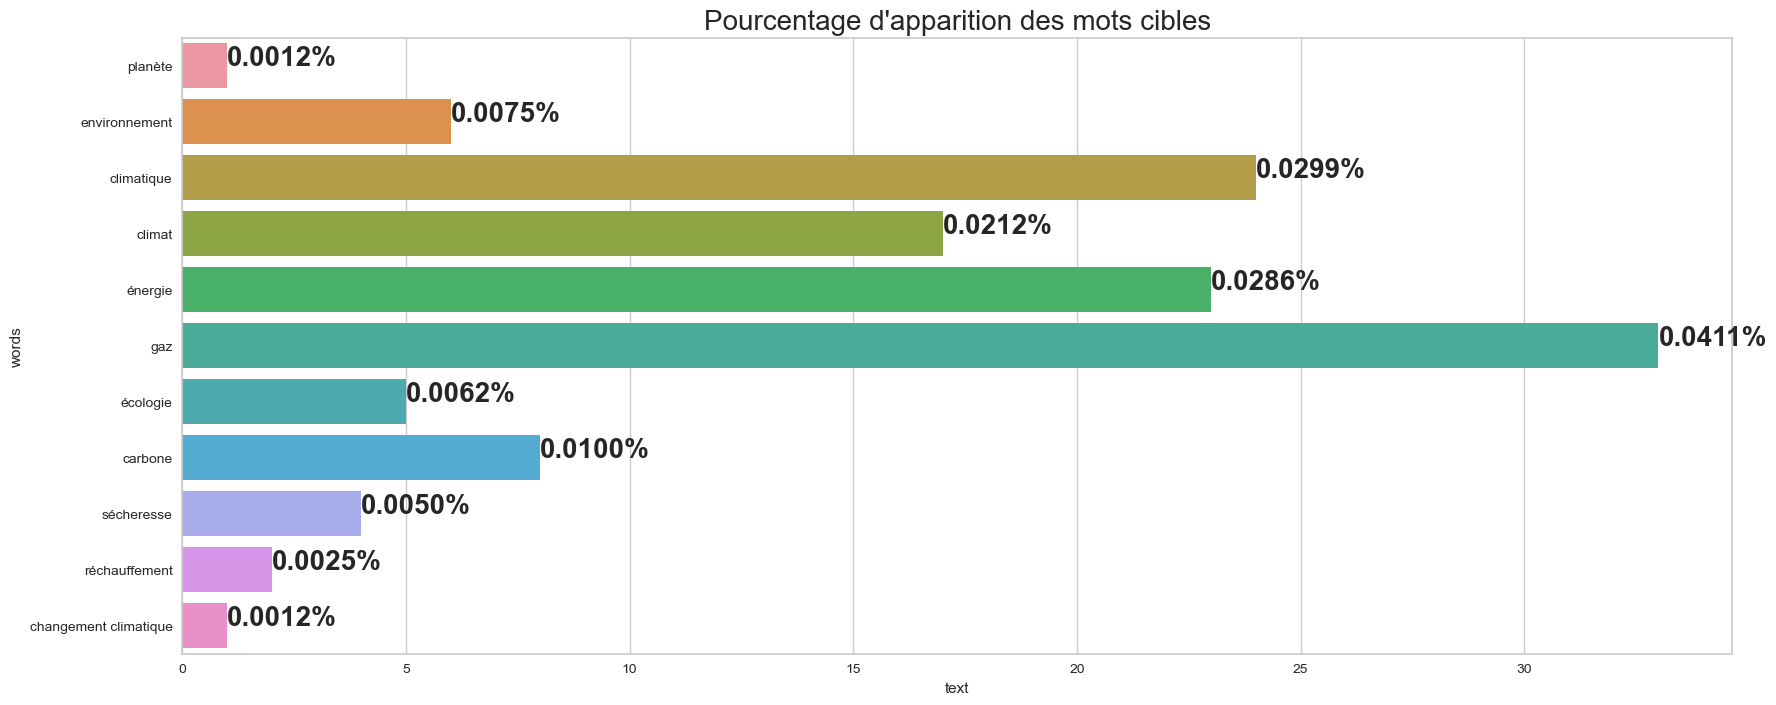

In [147]:
bar_plot("text","words",df_count)

In [154]:
# Apparition des mots clés sur le nombre d'articles
def bar_plot(x,y,data):
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.barplot(y=y, x=x, data=df_count)
    ax.set_title("Pourcentage d'apparition des mots cibles",fontsize=20)


    for p in ax.patches:
        percentage = '{:.4f}%'.format(100 * p.get_width()/len(df["text"]))
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

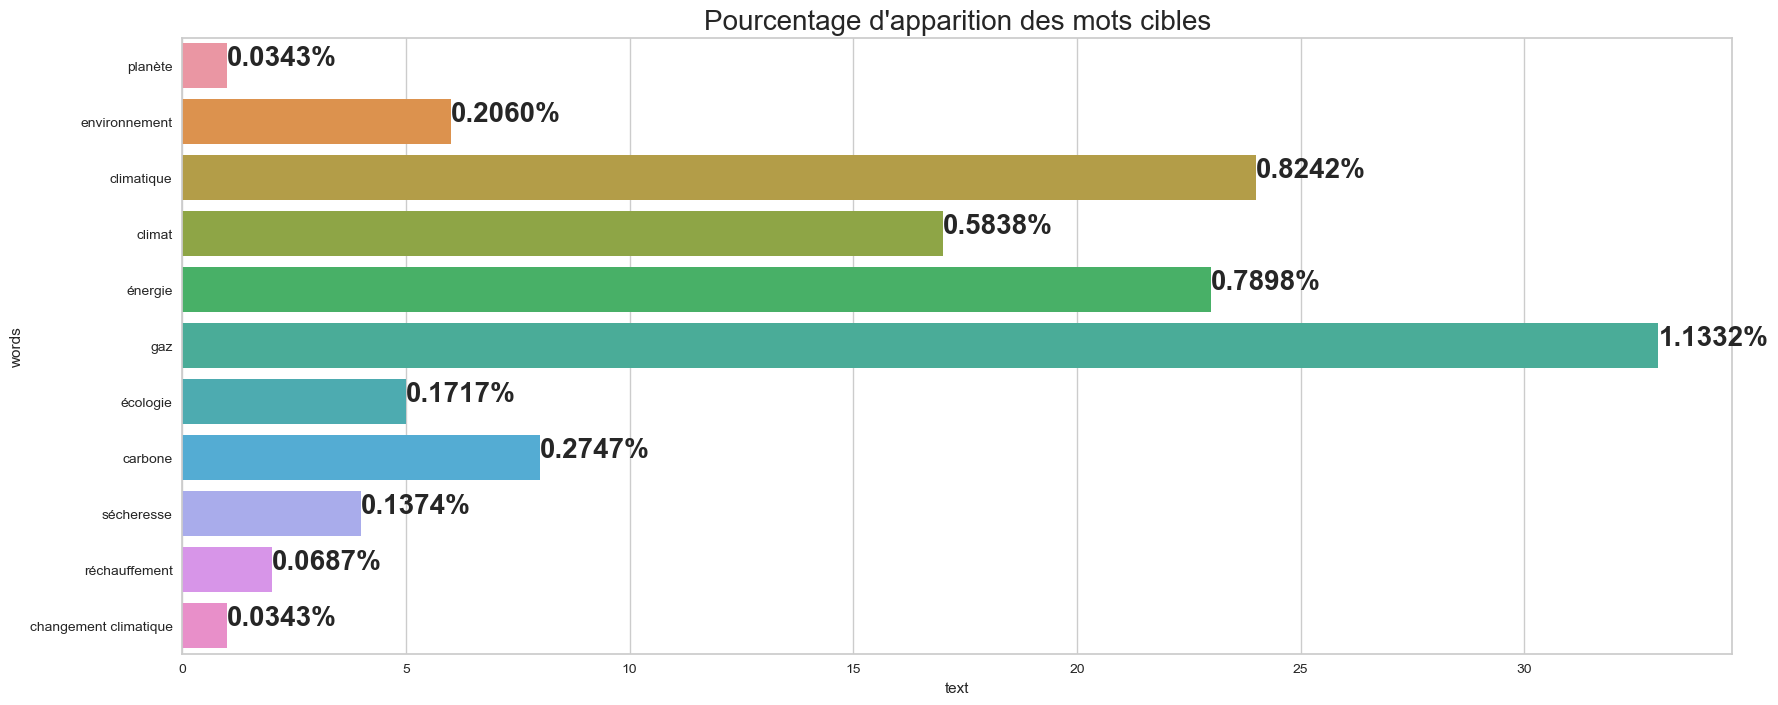

In [156]:
bar_plot("text","words",df_count)

comparaison avec d'autres topic

In [237]:
df_keywords_climat=df[df.news_title.str.contains("|".join(CLIMATE_KW))]
df_climat = round((df_keywords_climat.groupby("media").count() / df.groupby(["media"]).count()).news_title
        * 100,2,).reset_index()
df_climat= df_climat[["media","news_title"]]


media  news_title
0  lemonde      1.1300

In [261]:
df_climat["keyword list"] = "climat"

In [262]:
df_climat

media  news_title keyword list
0  lemonde      1.1300       climat

politique

In [246]:
politique_KW = ["élections municipales", "législatives","présidentielle","voter","retraite","droit","vote","premier ministre",
                "président","Emmanuel Macron","président de la république","loi","contre","manifestations","La mairie", "le maire",
                "débats à l’assemblée national","débat","réforme","Institutions","étranger","Ukrain"]
                
    

In [247]:
df_keywords_politique=df[df.news_title.str.contains("|".join(politique_KW))]
df_politique = round((df_keywords_politique.groupby("media").count() / df.groupby(["media"]).count()).news_title
        * 100,2,).reset_index()
df_politique= df_politique[["media","news_title"]]
df_politique

media  news_title
0  lemonde     19.5700

In [263]:
df_politique["keyword list"] = "politique"

In [265]:
df_to_plot = pd.concat([df_climat, df_politique])
fig = px.bar(
        df_to_plot,
        x="media",
        y="news_title",
        color="keyword list",
        title="Pourcentage de titre d'articles comprenant un mot des deux listes",
    )
fig.show()

Suite: 
- Rajouter une liste des mots politique pour faire un graphe de comparaison
- NLP pour catégoriser